In [2]:
import pandas as pd
import numpy as np

from pycaret.classification import *

from sklearn.metrics import log_loss

In [3]:
data_raw = catalog.load("raw_data_kobe")
data_raw

[04/02/23 08:35:19] INFO     Loading data from 'raw_data_kobe' (CSVDataSet)...                  ]8;id=44674;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=501487;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [4]:
data_intermediate = catalog.load("data_filtered")
data_intermediate

[04/02/23 08:35:22] INFO     Loading data from 'data_filtered' (ParquetDataSet)...              ]8;id=327578;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=200669;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
0,33.9723,-118.1028,10,1,0,18,NaN
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
...,...,...,...,...,...,...,...
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30693,34.0443,-118.2698,6,4,1,0,NaN
30694,33.8783,-118.4038,3,4,1,21,1.0


In [5]:
data_primary = catalog.load("data_conformed")
data_primary

[04/02/23 08:35:24] INFO     Loading data from 'data_conformed' (ParquetDataSet)...             ]8;id=293514;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=283984;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,0.0
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30694,33.8783,-118.4038,3,4,1,21,1.0


In [6]:
data_primary['shot_made_flag'].value_counts()

0.0    10602
1.0     9683
Name: shot_made_flag, dtype: int64

In [7]:
# Base está balanceada
data_primary['shot_made_flag'].value_counts(normalize=True)

0.0    0.522652
1.0    0.477348
Name: shot_made_flag, dtype: float64

In [8]:
base_train = catalog.load("base_train")
base_train

[04/02/23 08:35:28] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=710663;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=752391;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11476,34.0443,-118.2698,2,2,0,0,0.0
26552,34.0373,-118.3888,7,3,1,11,0.0
1209,34.0443,-118.2698,2,3,0,0,1.0
28269,34.0133,-118.4028,5,4,1,13,0.0
10504,34.0453,-118.1038,2,1,0,16,1.0
...,...,...,...,...,...,...,...
12390,34.0443,-118.2698,11,2,0,0,0.0
15071,33.9773,-118.4788,5,2,0,21,0.0
27609,33.9553,-118.2598,0,3,1,8,1.0
13,34.0403,-118.3638,2,1,0,9,0.0


In [9]:
base_test = catalog.load("base_test")
base_test

[04/02/23 08:35:30] INFO     Loading data from 'base_test' (ParquetDataSet)...                  ]8;id=360422;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=103498;file://C:\Users\vinli\anaconda3\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
6494,34.0443,-118.2698,5,4,0,0,1.0
2113,34.0313,-118.3028,7,1,0,3,0.0
5061,34.0493,-118.1798,2,2,0,9,0.0
24559,33.9873,-118.3828,7,1,0,12,0.0
30414,34.0443,-118.2698,3,3,1,0,0.0
...,...,...,...,...,...,...,...
21484,33.9073,-118.1448,4,1,0,18,1.0
24648,34.0653,-118.3788,7,4,0,11,1.0
1260,34.0443,-118.2698,2,3,0,0,0.0
10221,33.9983,-118.2488,5,2,0,5,0.0


In [10]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 17042023 )

,Description,Value
0,Session id,17042023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [11]:
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

Name                                                       Log Loss
Display Name                                               Log Loss
Score Function            <function log_loss at 0x000001AA0326B160>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [12]:
melhores_modelos = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
ada,Ada Boost Classifier,0.5896,0.5932,0.3509,0.6208,0.4482,0.1597,0.1765,6.5431,0.6040
gbc,Gradient Boosting Classifier,0.5887,0.5923,0.3765,0.6087,0.4650,0.1601,0.1724,6.5572,0.6050
lr,Logistic Regression,0.5780,0.5959,0.4756,0.5667,0.5170,0.1473,0.1492,6.7284,1.6000
lda,Linear Discriminant Analysis,0.5763,0.5965,0.4795,0.5637,0.5181,0.1444,0.1460,6.7550,0.5390
ridge,Ridge Classifier,0.5761,0.0000,0.4788,0.5636,0.5176,0.1440,0.1456,6.7578,0.5050
qda,Quadratic Discriminant Analysis,0.5761,0.5988,0.5264,0.5571,0.5412,0.1479,0.1481,6.7579,0.5520
nb,Naive Bayes,0.5754,0.5925,0.4997,0.5597,0.5279,0.1443,0.1452,6.7691,0.4990
lightgbm,Light Gradient Boosting Machine,0.5729,0.5897,0.4693,0.5601,0.5105,0.1369,0.1386,6.8098,0.5280
rf,Random Forest Classifier,0.5618,0.5744,0.5196,0.5404,0.5297,0.1199,0.1200,6.9852,0.7600
et,Extra Trees Classifier,0.5574,0.5648,0.5255,0.5347,0.5299,0.1118,0.1118,7.0568,0.8650


In [15]:
melhores_modelos

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=17042023),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=17042023, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_cl

In [36]:
ab_clf_model = melhores_modelos[0]
ab_clf_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=17042023)

In [37]:
type(ab_clf_model)

sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [38]:
for modelo in melhores_modelos:
    if "LogisticRegression" in str(modelo):
        lr_model = modelo
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17042023, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
type(lr_model)

sklearn.linear_model._logistic.LogisticRegression

In [20]:
# ab_clf_model_final = finalize_model(ab_clf_model)
# ab_clf_model_final

Pipeline(memory=FastMemory(location=C:\Users\vinli\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lat', 'lon', 'minutes_remaining',
                                             'period', 'playoffs',
                                             'shot_distance'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              v...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=17042023))],
         verbose=False)

In [22]:
# type(ab_clf_model_final)

pycaret.internal.pipeline.Pipeline

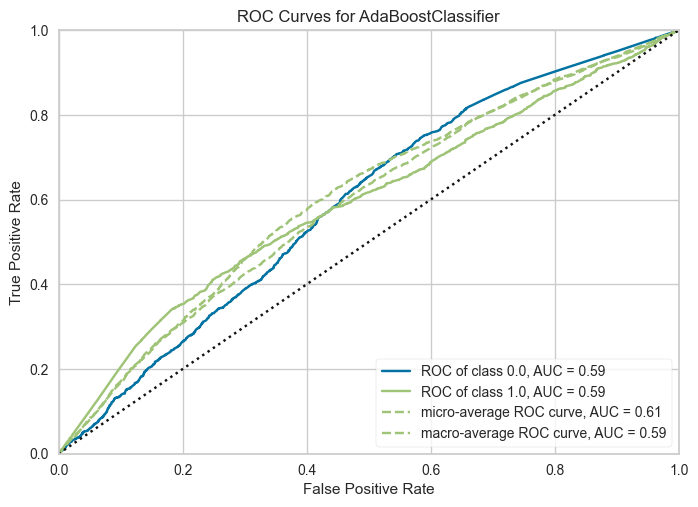

In [40]:
# plot_model(ab_clf_model_final)
plot_model(ab_clf_model)

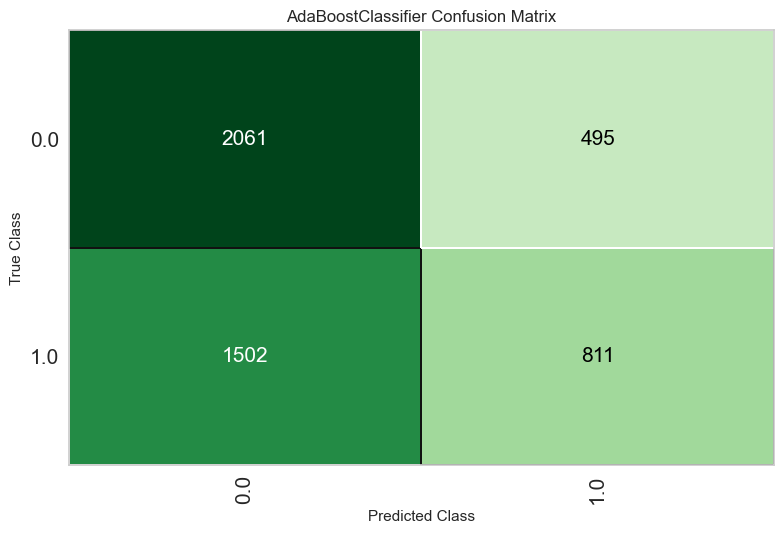

In [41]:
plot_model(ab_clf_model, plot='confusion_matrix')

In [19]:
# lr_model_final = finalize_model(lr_model)
# lr_model_final

Pipeline(memory=FastMemory(location=C:\Users\vinli\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lat', 'lon', 'minutes_remaining',
                                             'period', 'playoffs',
                                             'shot_distance'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              v...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=17042023,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

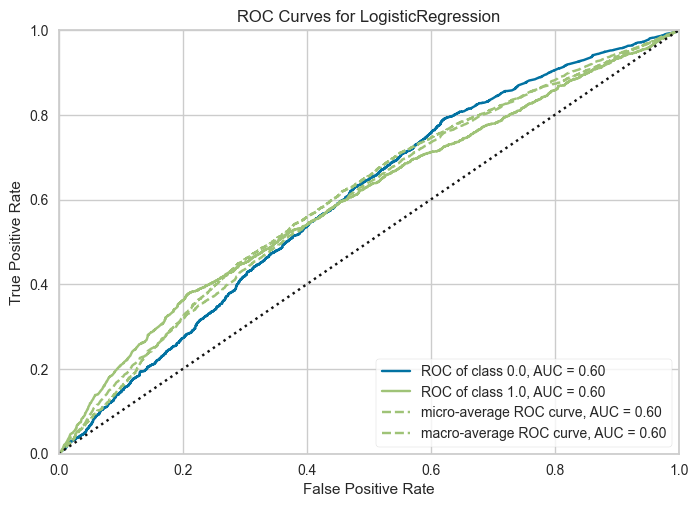

In [42]:
plot_model(lr_model)

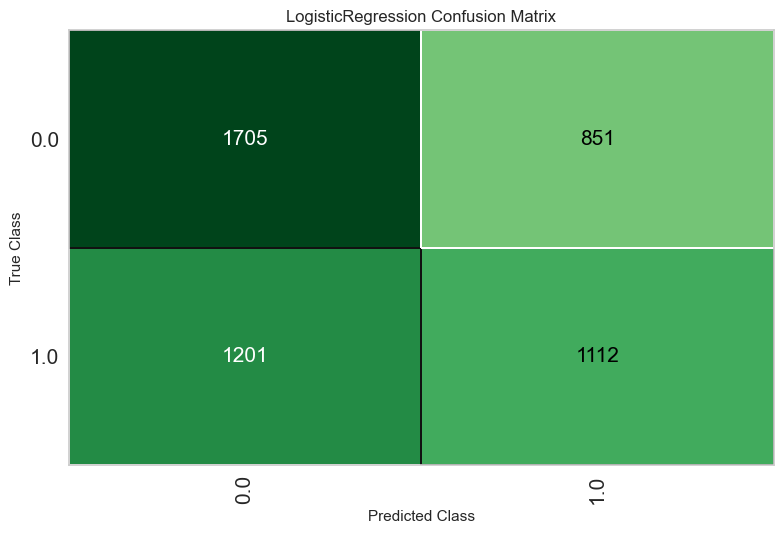

In [43]:
plot_model(lr_model, plot='confusion_matrix')

In [44]:
pred_ab_clf = predict_model(ab_clf_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,str,0.5894,0.6024,0.3484,0.6448,0.4523,0.1683,0.1888,6.5467


In [45]:
pred_lr = predict_model(lr_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,Logistic Regression,0.5748,0.5976,0.4770,0.5765,0.5220,0.1452,0.1474,6.7786
